In [21]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [22]:
dataset = 'dataset_angle_new.csv'
model_save_path = 'pose_detector_angle.keras'
model_save_name = 'pose_detector_angle'
model_tflite_name = 'pose_detector_angle.tflite'

In [23]:
NUM_CLASSES = 9

In [24]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(2, 5 + 1)))

In [25]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(1))

In [26]:
# y_dataset = y_dataset - 1
X_dataset.shape

(2951, 4)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((4, )),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [34]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 20)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 9)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409 (1.60 KB)

 Trainable params: 409 (1.60 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Model checkpoint callback
# path_model = os.path.dirname(model_save_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_save_path, verbose=1, save_weights_only=False
)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [36]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [37]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/18 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.0625 - loss: 162.0533
Epoch 1: saving model to pose_detector_angle.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0805 - loss: 146.1067 - val_accuracy: 0.0976 - val_loss: 83.5131
Epoch 2/1000
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0938 - loss: 100.8632
Epoch 2: saving model to pose_detector_angle.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1100 - loss: 98.7395 - val_accuracy: 0.1829 - val_loss: 58.0085
Epoch 3/1000
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1328 - loss: 76.3478
Epoch 3: saving model to pose_detector_angle.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1108 - loss: 74.6649 - val_accuracy: 0.1612 - val_loss: 39.0967
Epoch 4/1000
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1484 - loss: 47.3420
Epoch 4: saving model to pose_detector_angle.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1231 - loss: 49.4060 - val_accuracy: 

In [38]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9616 - loss: 0.3288 


In [39]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [40]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[1.9943916e-04 9.4959722e-04 8.8691550e-01 3.1657752e-02 2.6402477e-06
 2.2268979e-02 5.4296333e-02 9.3030663e-05 3.6167018e-03]
2


In [41]:
y_test[0]

2

# Save Model to TFfile

In [42]:
model.export(model_save_name)

INFO:tensorflow:Assets written to: pose_detector_angle\assets


INFO:tensorflow:Assets written to: pose_detector_angle\assets


Saved artifact at 'pose_detector_angle'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 4), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 9), dtype=tf.float32, name=None)
Captures:
  2856148338288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2856129118448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2856146978592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2856146980176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2856149055296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2856149053888: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [43]:
converter = tf.lite.TFLiteConverter.from_saved_model(model_save_name)
tflite_model = converter.convert()

In [44]:
with open(model_tflite_name, 'wb') as f:
    f.write(tflite_model)

# Confussion Matrix

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


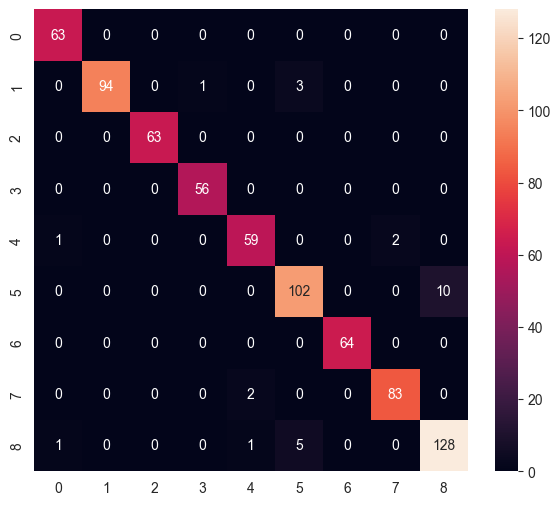

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        63
           1       1.00      0.96      0.98        98
           2       1.00      1.00      1.00        63
           3       0.98      1.00      0.99        56
           4       0.95      0.95      0.95        62
           5       0.93      0.91      0.92       112
           6       1.00      1.00      1.00        64
           7       0.98      0.98      0.98        85
           8       0.93      0.95      0.94       135

    accuracy                           0.96       738
   macro avg       0.97      0.97      0.97       738
weighted avg       0.96      0.96      0.96       738



In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)